# Implementation of Logistic Regression using Batch Gradient Descent

Ashik Repon 
Coursework 2 
Machine Learning 
2020/2021

<i> The Report and the answers of the questions are present at the end of the implementation. <i>

In [1]:
import numpy as np #importing NumPy
from matplotlib import pyplot as plt #Importing Matplotlib
'''
importing all the essential libraries 

Numpy: NumPy is a Python library used for working with arrays 
It also has functions that aid linear algebra and matrices.


Matplotlib: Python library used to creatic static visualisations. 
'''

'\nimporting all the essential libraries \n\nNumpy: NumPy is a Python library used for working with arrays \nIt also has functions that aid linear algebra and matrices.\n\n\nMatplotlib: Python library used to creatic static visualisations. \n'

In [2]:
'''
This block contains the dataset.
Probability of passing an exam vs hours studies 

X: This is a numpy array containing the hours studied 
y: Contains the probability of passing, which is binary (0 is fail, 1 is pass)

source of the dataset: 

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

'''

X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],
[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],
[4.50], [5.50]])

y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1]) 


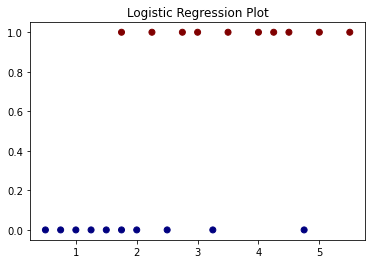

In [3]:
'''
This code is necessary to visualise the code 
This is commonly known as the data visualisation phase in machine learning. 
This was not a requirement, but it helps to understand the type of data that the 
problem is dealing with 

From the distribution of the points in the graph below, it can be deducted that this problem
requires logistic regression in order to be solved, as linear regression would not fit this 
data in the best manner.


plt.scatter() : sets the properties, properties contain x and y axis, feature to plot and color scheme. 

'''

plt.scatter(X,y, c=y, cmap='jet')
plt.title('Logistic Regression Plot')
plt.show()

In [4]:
'''
Data pre-processing 

np.vstack: sorting the elements of the arrays horrizontally (row-wise)
np.random.shuffle: shuffling the data randomly everytime the cell is being run 

'''
data = np.vstack((X.reshape(X.shape[0],), y)) #sorting numpy arrays
#matching the dimensions for stacking
np.random.shuffle(data.T) #shuffling data

print(data)

[[1.75 0.5  1.75 3.25 1.   2.25 5.   1.5  4.5  4.   4.75 4.25 2.75 3.
  2.   1.25 2.5  0.75 3.5  5.5 ]
 [1.   0.   0.   0.   0.   1.   1.   0.   1.   1.   0.   1.   1.   1.
  0.   0.   0.   0.   1.   1.  ]]


In [5]:
'''
Splitting into training set and test set
The split is 15:5 given that there are only 20 observations. 
The data is being re-shaped to fit the dimensions necessary
'''

train = data[:, :15] #using Python slice operations to split data
test = data[:, 15:]

print(train.shape) #printing to check shape is correct
print(test.shape)

X_train = train[0, :].reshape(1,train.shape[1] ) #reshaping to fit dimensions
Y_train = train[1, :].reshape(1, train.shape[1])

X_test = test[0, :].reshape(1, test.shape[1])
Y_test = test[1,:].reshape(1, test.shape[1])

(2, 15)
(2, 5)


In [6]:
#Checking if the shape have been pre-processed properly.

'''
Checking shapes of training and test sets. 

'''
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1, 15)
(1, 5)
(1, 15)
(1, 5)


In [7]:
#Definition of sigmoid function necessary for logistic regression. 

def sigmoid(x):
    '''
    This is the Sigmoid Hypothesis Function. exp is a function from math which raises the value in the brackets to the power of the 
    Euler's constant and it is a command part of the NumPy library. 
    
    '''
    result = 1/(1+np.exp(-x)) 
    return result

In [8]:
def logistic(X, y, lr, iterations): #parameters include data, targets, learning rate and number of iterations
    '''
    Logistic is the main function which contains 
    -Gradient Descent 
    -Cost Function 
    -Saves loss values in an array
    -Applies all mathematical notations for logistic regression 
    
    '''
    m = X_train.shape[1] #initialising m with shape 1
    n = X_train.shape[0] #initialising n with shape 15
    
    '''
    m and n represent the dimensions of the input data. 
    The naming convention derives from matrix dimensions commonly being referred to as m and n
    in the majority of mathematical notations. 
    
    m represents the dimension of the data observations --> hours worked
    n represents the number of features that m has. 
    
    
    '''
    
    W = np.zeros((n,1)) #initialise weight parameter with suitable shape
    B = 0 #initialise bias parameter
    '''
    W & B are the parameters that update in the upcoming Batch Gradient Descent
    
    '''

    lossvalues = [] #list in which values of each iteration is being saved 
    
    
    '''
    The For Loop below implements: 
    -Cost Function
    -Gradient Descent 
    -Conditional Statement to print Loss values at relevant iterations
    
    '''
    for i in range(iterations):
        dotpro = np.dot(W.T, X) + B #this line is executing dot product using numpy.dot()
        h = sigmoid(dotpro)
        '''
        Variables
        
        dotpro: The variable dotpro implements the dot product between the input, the W weight and the bias B. This variable
        is passed as an argument inside the sigmoid hypothesis function. 
        
        h: h stands for "hypothesis". The hypothesis function for Logistic Regression is the Sigmoid 
        Function, so h is assigned to the sigmoid function which has been previously defined. 
        
        '''
        
        #loss function (cost) - what we know as h(theta)
        #The mathematical notation has been converted into Python code. 
        loss = -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
        
        #Batch Gradient Descent Algorithm
        derW = (1/m)*np.dot(h-y,X.T)
        #iteration calculates the derivative of the parameters in order to 
        #improve the result
        derB = (1/m)*np.sum(h-y)
        
        
        '''
        derW: Derivative of the weight W update code 
        derB: Derivative of the parameter B update code
        
        Both variables are being updated through the derivative calculation using the np.dot matrix and mathematical 
        calculations implemented from the notation provided in the lecture slides. 
        
        ((1/m)*np.dot(h-y,X.T))
        
        '''
        #updating b to find local minima. 
        
        #updating both w and b to find local minima. 
        
        W = W - lr*derW.T #multiplying learning rate to get closer to global minimum and updating
        B = B - lr*derB #multiplying learning rate to get closer to global minimum and updating
        
        lossvalues.append(loss) #appending all loss values in the list as per assignment brief.
        
        if(i%(iterations/25) == 0): #printing iterations in multiples of 4. 
            print("Loss after", i, "iteration is : ", loss)
        
    return W, B, lossvalues

In [9]:
W, B, lossvalues = logistic(X_train, Y_train, lr = 0.85 , iterations = 100)

Loss after 0 iteration is :  0.6931471805599453
Loss after 4 iteration is :  0.6550408795446608
Loss after 8 iteration is :  0.629460894846215
Loss after 12 iteration is :  0.6113930332837023
Loss after 16 iteration is :  0.5989603803046909
Loss after 20 iteration is :  0.5905807966522167
Loss after 24 iteration is :  0.5848112880817198
Loss after 28 iteration is :  0.5806350219109624
Loss after 32 iteration is :  0.5774869309029823
Loss after 36 iteration is :  0.5750657869974583
Loss after 40 iteration is :  0.5731869504224641
Loss after 44 iteration is :  0.5717211087690397
Loss after 48 iteration is :  0.5705725613593712
Loss after 52 iteration is :  0.5696692209337949
Loss after 56 iteration is :  0.5689563331514235
Loss after 60 iteration is :  0.5683920404831051
Loss after 64 iteration is :  0.5679441590029009
Loss after 68 iteration is :  0.5675878116696859
Loss after 72 iteration is :  0.567303676528206
Loss after 76 iteration is :  0.5670766803429873
Loss after 80 iteration i

In [10]:
def findaccuracy(X, y, W, B):
    '''
    findaccuracy calculates the performance of the model
    This function finds the percentage of successful classifications against total cases. 
    acc is being calculated by dividing the number of successful classifications divided by total cases.
    '''
    
    dotpro = np.dot(W.T, X) + B #re-define the same mathematical notations
    h = sigmoid(dotpro)
    
    h = h > 0.5 #threshold of the sigmoid function
    #print(h) 
    #At this stage h is a boolean value 
    
    # must be converted to Int to execute the calculations to find the accuracy. 
    
    h = np.array(h, dtype = 'int32')
    #Convert the datatype of A into integer 
    
    acc = (1 - np.sum(np.absolute(h - y))/y.shape[1])*100 
    #Find out accurate percentage against the total data in the set
    #Depending on which set is passed y.shape represents the total amount of cases
    
    print("Accuracy : ", acc, "%")

In [11]:
findaccuracy(X_test, Y_test, W, B)

Accuracy :  100.0 %


# Report 

To implement logistic regression using batch gradient descent with the dataset about the probability of passing an exam vs hour studied, I have implemented 3 main Python functions. First, in the code, there is an import of the two main libraries used: NumPy and Matplotlib. Subsequently, the data has been imported by being copied in a code cell. The data is composed of X: hours studied and y: binary probability where 0 is fail and 1 is pass. In the next code cell, plt.scatter() has been used from Matplotlib to visualise the nature of the data using a very simple scatter plot. The visualisation makes it clear that this dataset requires logistic regression. 

The next part of the code (following the order from the top of the notebook) is the data pre-processing part. Vstack has been implemented to stack the NumPy arrays X and y in a vertical sequence (row wise) and saved into a variable called “data”, after which np.random.shuffle has been implemented on the transpose of variable data to generate random samples each time the data is run in the code cell, shuffling data is important because it ensures that each data point creates independent change on the model. The next phase is the training and testing split, the split ratio between training and testing is 15:5, during this stage some “reshape” operations have been executed to adjust the dimensions.
Sigmoid hypothesis function has been defined as an independent function following the mathematical notations. 

Sigmoid code:  1/(1+np.exp(-x)) 

The most relevant function is called logistic, which takes as input parameter X, y, learning rate and number of iterations. At the beginning of the function, I executed some further reshaping and defined an empty list to contain the loss values of each iteration. I have defined a main for loop for each iteration, inside which I have defined the main mathematical concepts for logistic regression: 

Cost function: -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

Updating a parameter through Batch Gradient Descent:  (1/m)*np.dot(h-y,X.T)

The main aim of the for loop inside the logistic function is to update the parameters via the learning rate and derivative calculations to get close and reach the global minimum. At the end of the loop, the loss values are appended in the list. There is an if statement to print the loss at each iteration. 
There is a function called findaccuracy to calculate the accuracy of the performance. 


<h2>Question 1 </h2>

After how many iterations, and for which learning rate (α) did your
algorithm converge? Plot the loss function with respect to iterations to illustrate this
point.

<b> Answer </b>

In the case of the probability of of "Passing an exam vs hours worked dataset", according to my logistic regression algorithm the algorithm starts to converges around the <b>20th iteration</b>, this convergence has been achieved with a learning rate of <b> 0.85 </b>

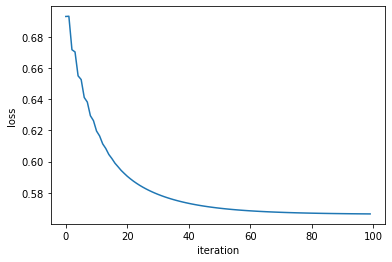

In [12]:
iterations = 100
plt.plot(np.arange(iterations), lossvalues)
plt.xlabel("iteration")
plt.ylabel("loss")

plt.show()


#decreasing the learning rate, means that the curve will take longer to converge and to 
#reach the local minima

<h2> Question 2 </h2>

What happens if α is too large? How does this affect the loss function?
Plot the loss function with respect to iterations to illustrate this point.

<b> Answer </b>

If the learning rate is too high, it will mathematically substract with large values, and instead of giving a loss value that decreases in each iteration, it will increase. This also means that the algorithm is not able to reach the global minimum point. I am going to run the regression classifier for 100 iterations with a learning rate of 5, which is relatively high compared to the optimal one in the previous section (0.85) and highlight the results of the loss value and the plot in the upcoming section. 


In [13]:
W, B, lossvalues = logistic(X_train, Y_train, lr = 5 , iterations = 100)

Loss after 0 iteration is :  0.6931471805599453
Loss after 4 iteration is :  0.9927501950523454
Loss after 8 iteration is :  5.047319835555244
Loss after 12 iteration is :  nan
Loss after 16 iteration is :  1.588609937007301
Loss after 20 iteration is :  3.2135027540758863
Loss after 24 iteration is :  nan
Loss after 28 iteration is :  1.9396420097772997
Loss after 32 iteration is :  1.5893084725406061
Loss after 36 iteration is :  1.184299455415316
Loss after 40 iteration is :  1.8184561417114058
Loss after 44 iteration is :  1.415372537125408
Loss after 48 iteration is :  1.1210626119168499
Loss after 52 iteration is :  1.406080334055409
Loss after 56 iteration is :  1.7383059418961153
Loss after 60 iteration is :  1.8979106176253548
Loss after 64 iteration is :  1.8002918034678954
Loss after 68 iteration is :  1.8581544871611455
Loss after 72 iteration is :  1.564705164906976
Loss after 76 iteration is :  1.2982303389136172
Loss after 80 iteration is :  1.4117311588372492
Loss after

<ipython-input-8-3768549c2723>:57: RuntimeWarning: divide by zero encountered in log
  loss = -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
<ipython-input-8-3768549c2723>:57: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))


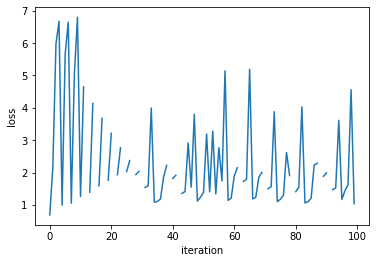

In [14]:
iterations = 100
plt.plot(np.arange(iterations), lossvalues)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
#for very large learning rate. 

As predicted, the graph does not converge with a high learning rate, so it does not reach the global minimum. 

<h2> Question 3 </h2>

Assume that you are applying logistic regression to the iris (flower)
dataset, as in the previous assignment. Answer the following questions:

(a) How would your hypothesis function change in this case and why?

<b> Answer </b>: 

The sigmoid hypothesis function can still be used in order to implement Logistic Regression with a multi-class problem such as the Iris dataset it is necessary to use a "One vs All" approach. This means that during the iterations of our model, one class needs to be compared to the rest of the classes in turn until all classes have been individually picked out to be compared to the rest of the classes.

Alternatively, a different hypothesis function can be used to tackle this problem, for example the softmax hypothesis function. softmax calculates the probability of the output being in all the classes, the sum is always 1, after which the class with the highest probability is selected, this is more suitable for multi-class problems. Also, instead of producing a single binary value like in the dataset of the probability of passing an exam vs hours worked, a one-hot encoded vector could be used for the output for a problem with multiple classes. 

(b) How would you utilize your implementation of logistic regression in order to
perform (multi-class) classification on the iris dataset? Include some pseudocode
while discussing your approach. 

<b> Answer </b> 

START
<br>
Download iris Dataset 
<br>
X = Data
<br>
y = targets
<br>
Reshape and Vectorize Iris Dataset 
<br>
Split Dataset in x_train, x_test, y_train, y_test 
<br>
Function Logistic Regression: 
<br>
    lossvalue = [] 
<br>
    hypothesis = softmax()
<br>
    For each iteration: 
        - Apply normal logistic regression cost function with softmax 
        - Apply gradient descend to update parameters 
        - Update parameters 
        - Produce one-hot encoded array with probabilities of multiple classes
        - chose class with highest probability and save
        - Append loss values in lossvalue list
        - return class with highest probability
    End 
End 